In [141]:
import os

label_path = os.getcwd() + '/data/Labeled_data/'
origin_path = os.getcwd() + '/data/Original_data/'
print(label_path, '\n',origin_path)

label_list = os.listdir(label_path)
origin_list = os.listdir(origin_path)

print(label_list[0:5])
print(origin_list[0:5])
      
label_list = os.listdir(label_path)
origin_list = os.listdir(origin_path)

print(label_list[0:5])
print(origin_list[0:5])

/home/ag/semantic-segmentation-tutorial-pytorch-ag/minicity/data/Labeled_data/ 
 /home/ag/semantic-segmentation-tutorial-pytorch-ag/minicity/data/Original_data/
['Seq05VD_f00750_L.png', 'Seq05VD_f02880_L.png', '0016E5_08123_L.png', '0001TP_009360_L.png', '0016E5_08041_L.png']
['0016E5_08069.png', '0016E5_08045.png', '0016E5_08051.png', '0001TP_006780.png', '0001TP_007680.png']
['Seq05VD_f00750_L.png', 'Seq05VD_f02880_L.png', '0016E5_08123_L.png', '0001TP_009360_L.png', '0016E5_08041_L.png']
['0016E5_08069.png', '0016E5_08045.png', '0016E5_08051.png', '0001TP_006780.png', '0001TP_007680.png']


In [138]:
from PIL import Image
import numpy as np
from tqdm import tqdm

In [58]:
print(np.array(Image.open(label_path + label_list[0])).reshape(-1, 3).shape)
img = np.array(Image.open(label_path + label_list[0])).reshape(-1, 3)[0]
print(img)
print([img[0], img[1], img[2]])
print([img[0], img[1], img[2]] == [128, 0, 0])
print(np.array(Image.open(label_path + label_list[0])).reshape(-1, 3)[0])
print(type(np.array(Image.open(label_path + label_list[0])).reshape(-1, 3)[0]))
print(np.array(Image.open(label_path + label_list[0])).shape)
print(np.array(Image.open(label_path + label_list[0]))[0].shape)
print(np.array(Image.open(label_path + label_list[0]))[0][0].shape)
print(np.array(Image.open(label_path + label_list[0]))[0][0])
print(np.array(Image.open(label_path + label_list[0]))[0][0][0])
print(np.array(Image.open(label_path + label_list[0]))[0][0][0] == 128) # 이렇게 픽셀 값 하나씩 다 비교해야됨,,,,?
print([np.array(Image.open(label_path + label_list[0]))[0][0]] == [128,0,0])

(691200, 3)
[128   0   0]
[128, 0, 0]
True
[128   0   0]
<class 'numpy.ndarray'>
(720, 960, 3)
(960, 3)
(3,)
[128   0   0]
128
True
False


In [88]:
from collections import namedtuple


#--------------------------------------------------------------------------------
# Definitions
#--------------------------------------------------------------------------------

# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for your approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    
    Label(  'Pole'                 ,  0 ,        0 , 'object'          , 0       , False        , True         , (  0,  0, 64) ),
    Label(  'Pole'                 ,  1 ,        0 , 'object'          , 0       , False        , True         , (192,192,128) ),
    Label(  'SignSymbol'           ,  2 ,        1 , 'object'          , 0       , False        , True         , (128,128, 64) ),
    Label(  'SignSymbol'           ,  3 ,        1 , 'object'          , 0       , False        , True         , (192,128,128) ),
    Label(  'SignSymbol'           ,  4 ,        1 , 'object'          , 0       , False        , True         , (  0, 64, 64) ),
    
    Label(  'Bicyclist'            ,  5 ,        2 , 'human'           , 1       , True         , False        , (  0,128,192) ),
    Label(  'Bicyclist'            ,  6 ,        2 , 'human'           , 1       , True         , False        , (192,  0,192) ),
    Label(  'Pedestrian'           ,  7 ,        3 , 'human'           , 1       , True         , False        , ( 64, 64,  0) ),
    Label(  'Pedestrian'           ,  8 ,        3 , 'human'           , 1       , True         , False        , (192,128, 64) ),
    Label(  'Pedestrian'           ,  9 ,        3 , 'human'           , 1       , True         , False        , ( 64,128, 64) ),
    Label(  'Pedestrian'           , 10 ,        3 , 'human'           , 1       , True         , False        , ( 64,  0,192) ),
    
    Label(  'Building'             , 11 ,        4 , 'construction'    , 2       , False        , False        , ( 64,  0, 64) ),
    Label(  'Building'             , 12 ,        4 , 'construction'    , 2       , False        , False        , (128,  0,  0) ),
    Label(  'Building'             , 13 ,        4 , 'construction'    , 2       , False        , False        , (192,  0,128) ),
    Label(  'Building'             , 14 ,        4 , 'construction'    , 2       , False        , False        , ( 64,192,  0) ),
    Label(  'Building'             , 15 ,        4 , 'construction'    , 2       , False        , False        , (  0,128, 64) ),
    Label(  'Fence'                , 16 ,        5 , 'construction'    , 2       , False        , False        , ( 64,128, 64) ),
    
    Label(  'Pavement'             , 17 ,        6 , 'flat'            , 3       , False        , False        , ( 64,192,128) ),
    Label(  'Pavement'             , 18 ,        6 , 'flat'            , 3       , False        , False        , (128,128,192) ),
    Label(  'Pavement'             , 19 ,        6 , 'flat'            , 3       , False        , False        , (  0,  0,192) ),
    Label(  'Road'                 , 20 ,        7 , 'flat'            , 3       , False        , False        , (192,  0, 64) ),
    
    Label(  'Car'                  , 21 ,        8 , 'vehicle'         , 4       , True         , False        , ( 64,128,192) ),
    Label(  'Car'                  , 22 ,        8 , 'vehicle'         , 4       , True         , False        , (128, 64, 64) ),
    Label(  'Car'                  , 23 ,        8 , 'vehicle'         , 4       , True         , False        , (192,128,192) ),
    Label(  'Car'                  , 24 ,        8 , 'vehicle'         , 4       , True         , False        , ( 64,  0,128) ),
    
    Label(  'Sky'                  , 25 ,        9 , 'sky'             , 5       , False        , False        , (128,128,128) ),
    
    Label(  'Tree'                 , 26 ,       10 , 'nature'          , 6       , False        , False        , (192,192,  0) ),
    Label(  'Tree'                 , 27 ,       10 , 'nature'          , 6       , False        , False        , (128,128,  0) ),
]

In [89]:
pixel2id = {' '.join(map(str, label.color)): label.trainId for label in labels}

In [90]:
pixel2id

{'0 0 64': 0,
 '192 192 128': 0,
 '128 128 64': 1,
 '192 128 128': 1,
 '0 64 64': 1,
 '0 128 192': 2,
 '192 0 192': 2,
 '64 64 0': 3,
 '192 128 64': 3,
 '64 128 64': 5,
 '64 0 192': 3,
 '64 0 64': 4,
 '128 0 0': 4,
 '192 0 128': 4,
 '64 192 0': 4,
 '0 128 64': 4,
 '64 192 128': 6,
 '128 128 192': 6,
 '0 0 192': 6,
 '192 0 64': 7,
 '64 128 192': 8,
 '128 64 64': 8,
 '192 128 192': 8,
 '64 0 128': 8,
 '128 128 128': 9,
 '192 192 0': 10,
 '128 128 0': 10}

In [144]:
for p in tqdm(label_list):
    img = np.array(Image.open(label_path + p))
    ret = np.array([[pixel2id[' '.join(map(str, pixel))] if ' '.join(map(str, pixel)) in pixel2id else 255 for pixel in row] for row in img], dtype=np.uint8)
    Image.fromarray(ret).save(new_label_path  + p)

100%|██████████| 701/701 [22:36<00:00,  1.93s/it]


In [142]:
label_list

['Seq05VD_f00750_L.png',
 'Seq05VD_f02880_L.png',
 '0016E5_08123_L.png',
 '0001TP_009360_L.png',
 '0016E5_08041_L.png',
 '0006R0_f02520_L.png',
 'Seq05VD_f01920_L.png',
 '0006R0_f03270_L.png',
 '0016E5_00630_L.png',
 'Seq05VD_f00390_L.png',
 'Seq05VD_f02910_L.png',
 '0016E5_08139_L.png',
 '0016E5_05790_L.png',
 '0001TP_008610_L.png',
 '0016E5_08149_L.png',
 '0016E5_02280_L.png',
 '0016E5_08147_L.png',
 '0001TP_008100_L.png',
 '0016E5_08101_L.png',
 '0001TP_008700_L.png',
 'Seq05VD_f00570_L.png',
 '0016E5_01590_L.png',
 '0016E5_07530_L.png',
 'Seq05VD_f05010_L.png',
 '0001TP_008340_L.png',
 '0001TP_008220_L.png',
 '0001TP_009210_L.png',
 '0016E5_08065_L.png',
 '0016E5_07965_L.png',
 '0016E5_07993_L.png',
 '0016E5_08125_L.png',
 '0016E5_08640_L.png',
 '0001TP_008640_L.png',
 '0006R0_f03450_L.png',
 'Seq05VD_f03480_L.png',
 '0001TP_009060_L.png',
 'Seq05VD_f03090_L.png',
 '0016E5_01410_L.png',
 '0016E5_07961_L.png',
 '0001TP_007710_L.png',
 '0001TP_008040_L.png',
 '0016E5_01680_L.png',
 '

'1 2 3'

In [133]:
img = np.array(Image.open(label_path + label_list[0]))
ret = np.array([[pixel2id[' '.join(map(str, pixel))] if ' '.join(map(str, pixel)) in pixel2id else 255 for pixel in row] for row in img], dtype=np.uint8)

In [104]:
import matplotlib.pyplot as plt

In [118]:
import matplotlib

In [127]:
matplotlib.image.imsave('test.png', ret)

In [121]:
Image.fromarray(ret, mode='I').save(new_label_path  + 'test.png')

In [135]:
Image.fromarray(ret).save(new_label_path  + 'test.png')

In [125]:
ret.shape

(720, 960)

In [137]:
np.array(Image.open(new_label_path  + 'test.png'))

array([[  4,   4,   4, ...,   4,   4,   4],
       [  4,   4,   4, ...,   4,   4,   4],
       [  4,   4,   4, ...,   4,   4,   4],
       ...,
       [  6,   6,   6, ..., 255, 255, 255],
       [  6,   6,   6, ..., 255, 255, 255],
       [  6,   6,   6, ..., 255, 255, 255]], dtype=uint8)

In [116]:
new_label_path = os.getcwd() + '/data/New_labeled_data/'
Image.fromarray(ret, ).save(new_label_path  + 'test.png')

TypeError: Cannot handle this data type: (1, 1), <i8

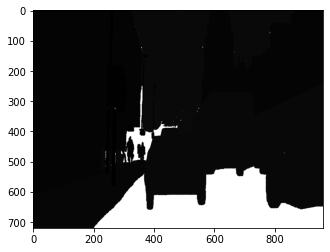

In [112]:
plt.imshow(np.array(ret), cmap='gray')

In [115]:
ret.shape

(720, 960)

In [49]:
import os
from PIL import Image
import numpy as np

label_path = os.getcwd() + '/data/Labeled_data/'

label_list = ['0001TP_006690_L.png']
for label in label_list:
    img = Image.open(label_path + label)
    img_np = np.array(img).reshape(-1, 3)
    for pixel in img_np:
        print(pixel)

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128   0   0]
[128   0   0]
[128 128 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[0 0 0]
[128 128 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 128 128]
[128 1

[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[192 192 128]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128   0   0]
[128  

KeyboardInterrupt: 